# Linear regression

In [1]:
import os

import numpy as np
import pandas as pd
pd.options.display.max_rows = 200
pd.options.display.max_columns = 100
pd.options.mode.chained_assignment = 'raise'  # forbid chained assignment to prevent implicit errors
pd.options.mode.chained_assignment = None

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (7, 6)  # set default figure size

import seaborn as sns
sns.set(font_scale=1.1)  # increase default font scale and set seaborn's plot style

from typing import List, Iterable


In [2]:
data_root_dp = os.path.join('C:/', 'Users', 'ww')  # change to yours path
print(f'data_root_dp: "{data_root_dp}"')

data_root_dp: "C:/Users\ww"


In [3]:
import sqlite3

#open connection to .sqlite file
data_sql_fp = os.path.join(data_root_dp, 'database.sqlite')
print(f'will read from: "{data_sql_fp}"')
con = sqlite3.connect(data_sql_fp)

df = pd.read_sql('select * from Player_Attributes', con)  # run SQL-query
print(f'shape: {df.shape}')
con.close()  # close connection to .sqlite file

#save to .csv
out_fp = os.path.join(data_root_dp, 'tmp', 'player_attributes.csv')
os.makedirs(os.path.dirname(out_fp), exist_ok=True)  # create directories if needed
print(f'will save to: "{out_fp}"')
df.to_csv(out_fp, index=False)

will read from: "C:/Users\ww\database.sqlite"
shape: (183978, 42)
will save to: "C:/Users\ww\tmp\player_attributes.csv"


In [4]:
data_player_attributes_fp = os.path.join(data_root_dp, 'player_attributes.csv')
print(f'reading from: "{data_player_attributes_fp}"')
df = pd.read_csv(data_player_attributes_fp)
print(df.shape)

reading from: "C:/Users\ww\player_attributes.csv"
(183978, 42)


In [6]:
# there are 3 'id' columns in data. 
# we will use 'player_api_id' only
# and drop other 'id' columns.
redundant_key_columns = ['id', 'player_fifa_api_id']

# also we will drop categorical columns for this task.
categorical_columns = ['preferred_foot', 'attacking_work_rate', 'defensive_work_rate']

cols_to_drop = redundant_key_columns + categorical_columns
print(f'will drop following columns: {cols_to_drop}')
df.drop(columns=cols_to_drop, inplace=True)

# rename 'player_api_id' column to shorter one: 'id'.
df.rename(columns={'player_api_id': 'id'}, inplace=True)

# cast string values to datetime
df['date'] = pd.to_datetime(df['date'])

# drop records that contain only NaNs in features
all_features = set(df.columns).difference(['id', 'date'])  # all columns without key columns
df.dropna(subset=all_features, how='all', inplace=True)

print(f'df.shape: {df.shape}')

will drop following columns: ['id', 'player_fifa_api_id', 'preferred_foot', 'attacking_work_rate', 'defensive_work_rate']
df.shape: (183142, 37)


In [7]:
# the dataset we're working with migh get updated in future (new records might be added).
# thus we remove any records with date larger than the current max date in data (2016-07-07)
# for compatibility with current version of notebook.
df.drop(index=df[df['date'] > '2016-07-07'].index, inplace=True)
print(df.shape)

(183142, 37)


In [8]:
df.duplicated(['id', 'date']).value_counts()

False    183142
dtype: int64

In [9]:
df.duplicated('id').value_counts()

True     172082
False     11060
dtype: int64

# Task 1. Keep only latest data for each player (1 point)

In [11]:
# # your code here
df['last date'] = df.groupby('id')['date'].transform('max')
df = df[df['date'] == df['last date']]
df = df.drop(columns=['last date'])
df
#print(df.shape)

,id,date,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,505942,2016-02-18,67.0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
5,155782,2016-04-21,74.0,76.0,80.0,53.0,58.0,71.0,40.0,73.0,70.0,69.0,68.0,71.0,79.0,78.0,78.0,67.0,90.0,71.0,85.0,79.0,56.0,62.0,68.0,67.0,60.0,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
38,162549,2016-01-07,65.0,67.0,64.0,58.0,60.0,66.0,52.0,66.0,67.0,63.0,62.0,67.0,77.0,74.0,85.0,51.0,92.0,61.0,65.0,66.0,71.0,57.0,60.0,55.0,64.0,68.0,61.0,23.0,22.0,24.0,16.0,11.0,12.0,9.0,13.0
64,30572,2016-04-21,69.0,69.0,57.0,21.0,68.0,65.0,48.0,56.0,38.0,40.0,61.0,62.0,33.0,34.0,62.0,57.0,41.0,59.0,71.0,49.0,90.0,29.0,70.0,62.0,26.0,54.0,37.0,72.0,71.0,68.0,15.0,12.0,13.0,12.0,11.0
87,23780,2015-12-24,70.0,70.0,46.0,34.0,73.0,65.0,33.0,47.0,42.0,25.0,58.0,58.0,33.0,31.0,41.0,68.0,52.0,48.0,67.0,60.0,75.0,26.0,66.0,68.0,29.0,41.0,45.0,75.0,73.0,71.0,8.0,6.0,16.0,12.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183924,26357,2015-03-06,73.0,73.0,42.0,27.0,74.0,70.0,30.0,54.0,49.0,33.0,53.0,63.0,53.0,63.0,62.0,68.0,62.0,57.0,84.0,54.0,76.0,30.0,75.0,66.0,22.0,52.0,50.0,76.0,77.0,72.0,14.0,10.0,11.0,8.0,12.0
183937,111182,2014-09-18,63.0,67.0,65.0,44.0,59.0,63.0,49.0,57.0,67.0,64.0,63.0,61.0,69.0,68.0,62.0,65.0,58.0,30.0,68.0,77.0,69.0,31.0,67.0,61.0,49.0,49.0,53.0,57.0,61.0,61.0,9.0,8.0,5.0,5.0,8.0
183953,36491,2011-02-22,68.0,73.0,64.0,38.0,71.0,66.0,57.0,65.0,60.0,44.0,60.0,67.0,71.0,73.0,59.0,69.0,72.0,59.0,42.0,70.0,68.0,53.0,78.0,64.0,58.0,66.0,61.0,67.0,71.0,59.0,15.0,13.0,5.0,6.0,6.0
183960,35506,2011-02-22,67.0,78.0,48.0,43.0,79.0,59.0,59.0,36.0,29.0,37.0,51.0,61.0,66.0,66.0,56.0,62.0,53.0,50.0,68.0,68.0,67.0,46.0,71.0,67.0,28.0,63.0,45.0,65.0,66.0,65.0,14.0,7.0,15.0,10.0,12.0


In [12]:
assert df.duplicated(['id']).sum() == 0
assert df.shape == (11060, 37)

In [13]:
# no longer need 'id' and 'date' columns
df.drop(columns=['id', 'date'], inplace=True)

In [14]:
df.isna().sum()

overall_rating          0
potential               0
crossing                0
finishing               0
heading_accuracy        0
short_passing           0
volleys               478
dribbling               0
curve                 478
free_kick_accuracy      0
long_passing            0
ball_control            0
acceleration            0
sprint_speed            0
agility               478
reactions               0
balance               478
shot_power              0
jumping               478
stamina                 0
strength                0
long_shots              0
aggression              0
interceptions           0
positioning             0
vision                478
penalties               0
marking                 0
standing_tackle         0
sliding_tackle        478
gk_diving               0
gk_handling             0
gk_kicking              0
gk_positioning          0
gk_reflexes             0
dtype: int64

In [15]:
df.isna().sum(axis=1).value_counts()

0    10582
7      478
dtype: int64

# Task 2. Drop rows that contain NaNs (1 point)

In [16]:
# your code here
df = df.dropna(axis='index')

In [17]:
assert df.isna().sum().sum() == 0

# Task 3. Implement main regression metrics yourself (up to 4 points):  
Mean Squared Error (mse) - (1 point)  
Mean Absolute Error (mae) - (1 point)  
Mean Absolute Percentage Error (mape) - (1 point)  
R-squared (r2) - (1 point)  

In [18]:
# we use '*' in the beggining of each function signature
# to forbid positional arguments and enforce the use of kwargs.
# this helps to avoid mistake when arguments are passed in wrong order.

# write down code instead of raising NotImplementedError in each of functions below.

def mse(*, y_true, y_pred):
    sum = 0
    for i in range(len(y_true)):
        sum = sum + (y_true[i] - y_pred[i])**2
    return sum/len(y_true)

    
def mae(*, y_true, y_pred):
    sum = 0
    for i in range(len(y_true)):
        sum = sum + abs(y_true[i] - y_pred[i])
    return sum/len(y_true)

eps = np.finfo(np.float64).eps

def mape(*, y_true, y_pred):
    sum = 0
    for i in range(len(y_true)):
        if (abs(y_true[i]) < eps):
            sum = sum + abs((eps - y_pred[i])/eps)
        else:
            sum = sum + abs((y_true[i] - y_pred[i])/y_true[i])
    return sum/len(y_true)
    
def r2(*, y_true, y_pred):
    y_mean = 0
    s_res = 0
    s_tot = 0
    for i in range(len(y_true)):
        s_res = s_res + (y_true[i] - y_pred[i])**2
        y_mean = y_mean + y_true[i]
    y_mean = y_mean/len(y_true)
    for i in range(len(y_true)):
        s_tot = s_tot + (y_true[i] - y_mean)**2
    #print(y_mean, s_res, s_tot)
    if (s_res == 0):
        return 1
    if (s_tot == 0):
        return 0
    else:
        return 1-s_res/s_tot

In [19]:
from sklearn.metrics import (
    mean_squared_error as mse_lib, 
    mean_absolute_error as mae_lib,
    mean_absolute_percentage_error as mape_lib,
    r2_score as r2_lib
)

In [20]:
def compare_metrics(fn, fn_lib, y_true, y_pred, n_digits=9):
    """ Print and compare values of custom and library functions using given precision. """
    m_fn = fn(y_true=y_true, y_pred=y_pred)
    m_fn_lib = fn_lib(y_true=y_true, y_pred=y_pred)
    print(f'{fn.__name__} custom : {m_fn}')
    print(f'{fn.__name__} library: {m_fn_lib}')
    print()
    assert round(m_fn, n_digits) == round(m_fn_lib, n_digits)

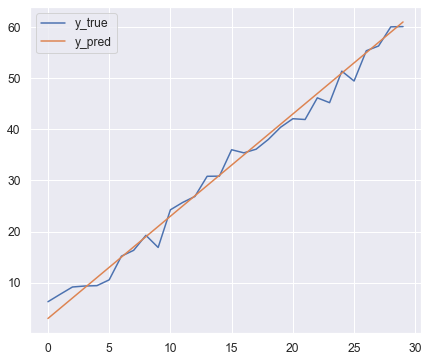

In [21]:
n = 30
x = np.arange(n)
y_true = 2 * x + 3 + np.random.normal(loc=0, scale=2, size=n)
y_pred = 2 * x + 3

plt.plot(x, y_true, label='y_true')
plt.plot(x, y_pred, label='y_pred')
plt.legend();

In [22]:
compare_metrics(mse, mse_lib, y_true=y_true, y_pred=y_pred)
compare_metrics(mae, mae_lib, y_true=y_true, y_pred=y_pred)
compare_metrics(mape, mape_lib, y_true=y_true, y_pred=y_pred)
compare_metrics(r2, r2_lib, y_true=y_true, y_pred=y_pred)
print('all tests passed')

mse custom : 3.540986884113949
mse library: 3.540986884113948

mae custom : 1.4421043309676196
mae library: 1.4421043309676196

mape custom : 0.08310036214203671
mape library: 0.08310036214203669

r2 custom : 0.9873836436555228
r2 library: 0.9873836436555228

all tests passed


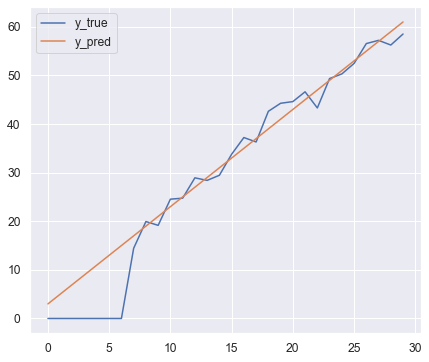

In [23]:
n = 30
x = np.arange(n)
y_true = 2 * x + 3 + np.random.normal(loc=0, scale=2, size=n)
y_true[:7] = 0
y_pred = 2 * x + 3

plt.plot(x, y_true, label='y_true')
plt.plot(x, y_pred, label='y_pred')
plt.legend();

In [30]:
compare_metrics(mse, mse_lib, y_true=y_true, y_pred=y_pred)
compare_metrics(mae, mae_lib, y_true=y_true, y_pred=y_pred)
compare_metrics(mape, mape_lib, y_true=y_true, y_pred=y_pred)
compare_metrics(r2, r2_lib, y_true=y_true, y_pred=y_pred)
print('all tests passed')

mse custom : 25.484159576639218
mse library: 25.48415957663922

mae custom : 3.3437094022652607
mae library: 3.34370940226526

mape custom : 9457559217478042.0
mape library: 9457559217478042.0

r2 custom : 0.9373315423765254
r2 library: 0.9373315423765254

all tests passed


In [33]:
# constant target value
n = 30
x = np.arange(n)
y_true = np.repeat(15, n)
y_pred = 2 * x + 3

compare_metrics(r2, r2_lib, y_true=y_true, y_pred=y_pred)
print('success')

r2 custom : 0
r2 library: 0.0

success


In [34]:
# perfect fit
n = 30
x = np.arange(n)
y_true = 2 * x + 3 + np.random.normal(loc=0, scale=2, size=n)
y_pred = y_true

compare_metrics(r2, r2_lib, y_true=y_true, y_pred=y_pred)
print('success')

r2 custom : 1
r2 library: 1.0

success


In [35]:
def get_metrics(*, y_true, y_pred) -> pd.Series:
    """ A helper function to return all metrics for given labels and predictions. """
    
    # if you didn't implement some metrics, comment them out for this function to work.
    return pd.Series({
        'mse': mse(y_true=y_true, y_pred=y_pred),
        'mae': mae(y_true=y_true, y_pred=y_pred),
        'mape': mape(y_true=y_true, y_pred=y_pred),
        'r2': r2(y_true=y_true, y_pred=y_pred),
    })

In [36]:
def fit_and_evaluate(model, x_train, y_train, x_test, y_test) -> pd.DataFrame:
    """ 
    A helper function to: 
    * fit a passed model
    * and return metrics on train and test sets.
    """
    # fit the model
    model.fit(x_train, y_train)
    
    # return metrics as pd.DataFrame
    m = pd.DataFrame([
        get_metrics(y_true=y_train, y_pred=model.predict(x_train)),  # metrics for train set
        get_metrics(y_true=y_test, y_pred=model.predict(x_test))     # metrics for test set
    ], index=['train', 'test']
    )
    
    return m

In [37]:
print(df.shape)
ix_split = int(0.8 * df.shape[0])
DF_TRAIN = df.iloc[:ix_split].copy()
DF_TEST = df.iloc[ix_split:].copy()
print(DF_TRAIN.shape, DF_TEST.shape)

(10582, 35)
(8465, 35) (2117, 35)


In [38]:
def get_train_test_data(features: List[str], target: str) -> tuple:
    """
    Return x_train, y_train, x_test, y_test using 
    * global train/test split 
    * features and target provided.
    """
    # in general, it's a bad practice to use global variables. 
    # however, we use it here with caution for simplicity.
    return (
        DF_TRAIN[features].copy(), DF_TRAIN[target].copy(), 
        DF_TEST[features].copy(), DF_TEST[target].copy()
    )

In [39]:
target = 'dribbling'
features = ['short_passing']
x_train, y_train, x_test, y_test = get_train_test_data(features, target)

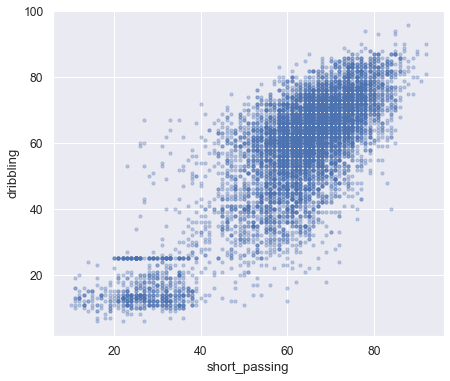

In [40]:
plt.scatter(x=x_train, y=y_train, alpha=0.3, s=10);
plt.xlabel('short_passing');
plt.ylabel('dribbling');

# Task 4. Compute Pearson correlation coefficient between feature and target (1 pont)

In [45]:
# your code here
df['dribbling'].corr(df['short_passing'])

0.8129375578604555

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
model = LinearRegression(fit_intercept=True)
model.fit(x_train, y_train);

In [48]:
model_intercept = model.intercept_
model_slope = model.coef_[0]
print(f'model_intercept: {model_intercept}')
print(f'model_slope: {model_slope}')

model_intercept: -6.2110299050260025
model_slope: 1.0366141627766243


In [49]:
model_preds = model.predict(x_test)
model_preds

array([55.98581986, 65.31534733, 44.58306407, ..., 62.20550484,
       54.9492057 , 76.71810312])

In [50]:
print('model metrics on test set')
metrics_test_1 = get_metrics(y_true=np.asarray(y_test), y_pred=model_preds)
metrics_test_1

model metrics on test set


mse     108.345801
mae       8.173553
mape      0.205500
r2        0.681477
dtype: float64

# Task 5. Calculate predictions for test set manually (1 point)

In [54]:
# use `x_test` for calculations as is (it's a DataFrame with 1 column).
# do not convert it to Series or numpy array.

# your code here:
model_manual_preds = model_intercept + model_slope*x_test

In [55]:
assert isinstance(model_manual_preds, pd.DataFrame)

In [56]:
# ensure our manual predictions are the same as model generated
assert np.allclose(model_preds, model_manual_preds.iloc[:, 0].to_numpy())
print('success')

success


# Task 6. Plot test data and predicted values (1 point)

Text(0.5, 1.0, 'Test data and predicted values')

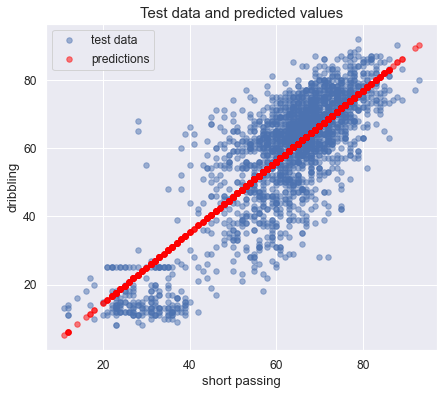

In [83]:
# your code here
plt.scatter(x_test, y_test, alpha=0.5, s=30, label='test data')
plt.scatter(x_test, model_manual_preds, alpha=0.5, s=30, color='red', label='predictions')
plt.legend()
plt.xlabel("short passing")
plt.ylabel("dribbling")
plt.title("Test data and predicted values",fontsize=15)
# plt.legend(...);  # adds legend to a plot

# Task 7. Fit regression model manually (3 points)

In [100]:
x = x_train.iloc[:, 0].to_numpy()
y = y_train.to_numpy()

In [102]:
# your code here:
def mean(x):
    x_mean = 0
    for i in range(len(x)):
        x_mean = x_mean + x[i]
    return x_mean/len(x)

def w1(x, y):
    x_mean = mean(x)
    a = 0
    b = 0
    for i in range(len(x)):
        a = a + (x[i] - x_mean)*y[i]
        b = b + (x[i] - x_mean)**2
    return a/b

def w0(x, y, manual_slope):
    return mean(y) - manual_slope*mean(x)

manual_slope = w1(x, y)
manual_intercept = w0(x, y, manual_slope)

In [103]:
print(f'manual_intercept: {manual_intercept}')
print(f'manual_slope: {manual_slope}')

manual_intercept: -6.211029905026301
manual_slope: 1.0366141627766292


In [104]:
assert round(model_intercept, 9) == round(manual_intercept, 9)
assert round(model_slope, 9) == round(manual_slope, 9)
print('success')

success


In [105]:
target = 'dribbling'
features = ['ball_control', 'short_passing', 'strength', 'sprint_speed']
x_train, y_train, x_test, y_test = get_train_test_data(features, target)

In [107]:
cols = features + [target]
print(cols)

['ball_control', 'short_passing', 'strength', 'sprint_speed', 'dribbling']


# Task 8 (1 point)

,ball_control,short_passing,strength,sprint_speed,dribbling
ball_control,1.000000,0.904857,-0.024422,0.572677,0.919271
short_passing,0.904857,1.000000,0.039196,0.450801,0.809405
strength,-0.024422,0.039196,1.000000,-0.203386,-0.150197
sprint_speed,0.572677,0.450801,-0.203386,1.000000,0.656453
dribbling,0.919271,0.809405,-0.150197,0.656453,1.000000


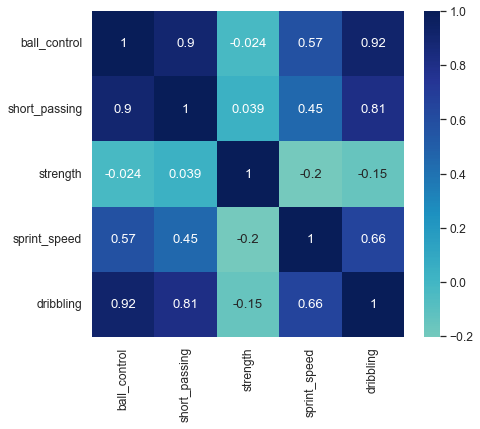

In [140]:
# your cod# # your code here

correlation_matrix =  DF_TRAIN[cols].corr()
display(correlation_matrix)
sns.heatmap(correlation_matrix, cmap="YlGnBu", annot=True, center=0);

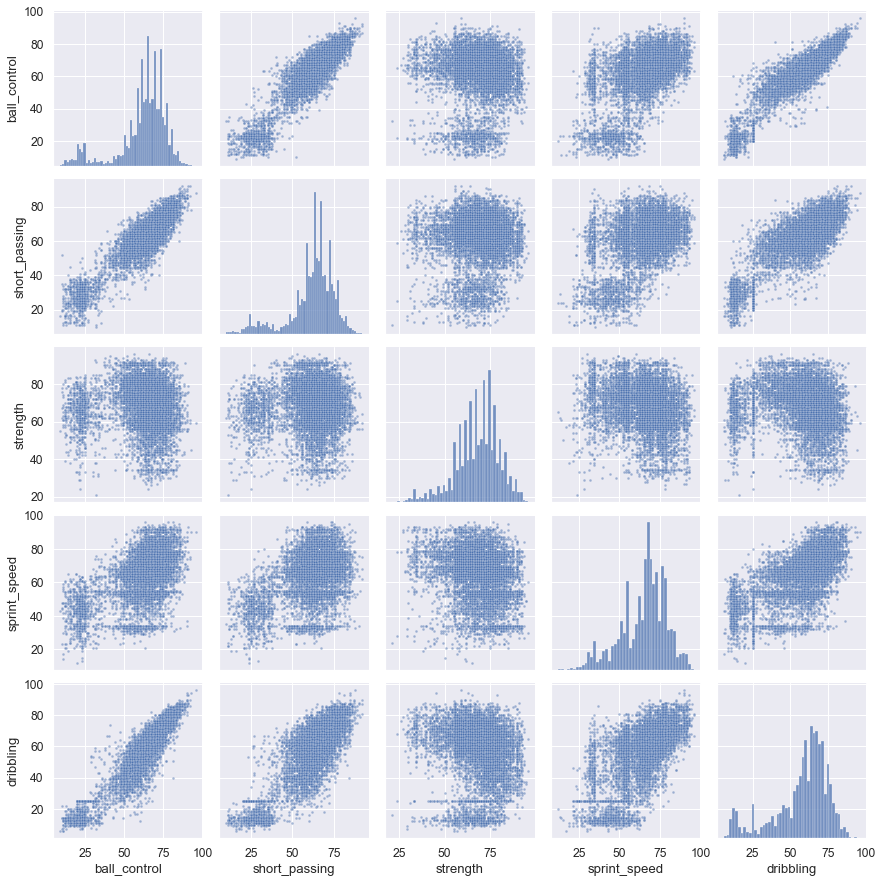

In [146]:
sns.pairplot(DF_TRAIN[cols], plot_kws={'s': 7, 'alpha': 0.5});

In [147]:
model = LinearRegression(fit_intercept=True)
model.fit(x_train, y_train);

In [148]:
model_intercept = model.intercept_
model_coef = model.coef_
print(f'model_intercept: {model_intercept}')
print(f'model_coef: {model_coef}')

model_intercept: -4.41076099449662
model_coef: [ 0.98220522 -0.03927767 -0.14440889  0.20772844]


In [149]:
model_preds = model.predict(x_test)
model_preds

array([44.30711902, 61.5246943 , 56.23794497, ..., 64.14903371,
       57.22105591, 75.15698321])

In [151]:
print('model metrics on test set')
metrics_test_2 = get_metrics(y_true=np.asarray(y_test), y_pred=model_preds)
metrics_test_2

model metrics on test set


mse     38.192447
mae      4.459334
mape     0.112574
r2       0.887719
dtype: float64

In [152]:
# combine 2 series in 1 dataframe
metrics_comparison = metrics_test_1.to_frame('LR_1v').join(metrics_test_2.rename('LR_mv')).T
metrics_comparison

,mse,mae,mape,r2
LR_1v,108.345801,8.173553,0.205500,0.681477
LR_mv,38.192447,4.459334,0.112574,0.887719


C:\Users\ww\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\__init__.py:71: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


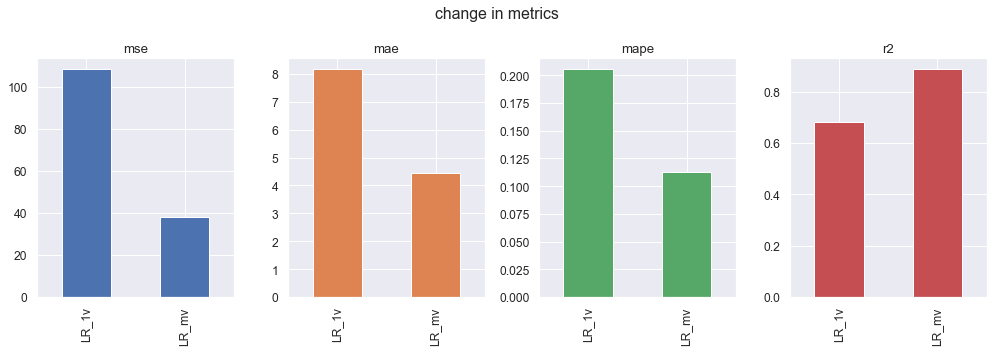

In [153]:
fig, ax = plt.subplots(figsize=(14, 5))  # specify figure size
metrics_comparison.plot(
    kind='bar', layout=(1,4), subplots=True, 
    title='change in metrics', legend=False, ax=ax
);
fig.tight_layout();  # prettify subplots. read more in documentation if interested

# Task 9. Implement Linear regression model with multiple variables yourself (5 points)

In [154]:
from sklearn.exceptions import NotFittedError

In [200]:
def add_ones_column(x):
    """ 
    Add column consisting of ones to the beginning of matrix `x`. 
    Used when fitting `LRMatrixForm` with `fit_intercept` param set to True.
    """
    # HINTS: 
    # * create a vector that consists of ones: (1, 1, ..., 1)
    # * then use either `np.column_stack` or `np.hstack` function to add this vector to a matrix
    
    # your code here:
    n = x.shape[0]
    z = np.ones((n, 1))
    return np.hstack((z, x))

class LRMatrixForm:
    """
    Class that encapsulates Linear regression model with multiplie variables.
    Calculations are performed using matrix formula.
    
    Use `fit()` method to fit the model on data.
    Use `predict()` method to calculate predictions when the model is fitted.
    """
    def __init__(self, fit_intercept: bool = True):
        """
        fit_intercept: 
        Whether to calculate the intercept for this model. 
        If set to False, no intercept will be used in calculations 
        (i.e. data is expected to be centered).
        """
        self.fit_intercept = fit_intercept
        self.w_ = None  # vector with all model parameters (intercept and weights)
    
    def fit(self, x_train: pd.DataFrame, y_train: pd.Series):
        X = x_train.to_numpy()  # convert pd.DataFrame to numpy matrix
        
        if self.fit_intercept is True:
            # when creating a model with intercept term we need to extend feature matrix
            # with a column consisting of ones (1, 1, ..., 1).
            X = add_ones_column(X)
            
        # your code here to calculate model parameters:
        #x_transpose = X.transpose()
        #L =  np.linalg.inv(x_transpose.dot(X))
        #R = L.dot(x_transpose)
        #self.w_ = R.dot(y_train)
        self.w_ = np.linalg.inv(X.transpose().dot(x)).dot(X.transpose()).dot(y_train)
        
    @property
    def coef_(self):
        """ Property that returns model parameters without the intercept term. """
        if self.w_ is None:
            raise NotFittedError()
        # your code here:
        x_transpose = X.transpose()
        L =  np.linalg.inv(x_transpose.dot(X))
        R = L.dot(x_transpose)
        return R.dot(y_train)[1:0]
    
    @property
    def intercept_(self):
        """ Property that returns intercept term from model parameters. """
        if self.fit_intercept is not True:
            return 0.0  # for compatibility with sklearn
        if self.w_ is None:
            raise NotFittedError()
        # your code here:
        return R.dot(y_train)[0]
    
    def predict(self, x_test: pd.DataFrame):
        """ Generate predictions using fitted model parameters. """
        if self.w_ is None:
            raise NotFittedError()
        
        X = x_test.to_numpy()  # convert pd.DataFrame to numpy matrix
        
        if self.fit_intercept is True:
            X = add_ones_column(X)
            
        # your code here to calculate predictions
        
        return X.dot(self.w_)

In [201]:
lr_matrix_form = LRMatrixForm(fit_intercept=True)
fit_and_evaluate(lr_matrix_form, x_train, y_train, x_test, y_test)

ValueError: shapes (5,8465) and (10582,) not aligned: 8465 (dim 1) != 10582 (dim 0)

In [202]:
print(f'intercept: {lr_matrix_form.intercept_}')
print(f'coef: {lr_matrix_form.coef_}')

NotFittedError: 

In [203]:
assert np.allclose(model.predict(x_test), lr_matrix_form.predict(x_test))
assert round(model.intercept_, 9) == round(lr_matrix_form.intercept_, 9)
assert np.allclose(model.coef_, lr_matrix_form.coef_)

NotFittedError: 

In [204]:
(model.predict(x_test) - y_test).describe()

count    2117.000000
mean       -0.000265
std         6.181464
min       -19.832055
25%        -3.624840
50%        -0.929033
75%         2.657819
max        39.721074
Name: dribbling, dtype: float64

In [205]:
model = LinearRegression(fit_intercept=False)
fit_and_evaluate(model, x_train, y_train, x_test, y_test)

KeyError: 1

In [206]:
model = LinearRegression(fit_intercept=False)
fit_and_evaluate(model, x_train, y_train, x_test, y_test)

KeyError: 1

In [207]:
lr_matrix_form = LRMatrixForm(fit_intercept=False)
fit_and_evaluate(lr_matrix_form, x_train, y_train, x_test, y_test)

ValueError: shapes (4,8465) and (10582,) not aligned: 8465 (dim 1) != 10582 (dim 0)

In [208]:
print(f'intercept: {lr_matrix_form.intercept_}')
print(f'coef: {lr_matrix_form.coef_}')

intercept: 0.0


NotFittedError: 

In [209]:
assert np.allclose(model.predict(x_test), lr_matrix_form.predict(x_test))
assert round(model.intercept_, 9) == round(lr_matrix_form.intercept_, 9)
assert np.allclose(model.coef_, lr_matrix_form.coef_)

NotFittedError: 

In [210]:
(model.predict(x_test) - y_test).describe()

count    2117.000000
mean        0.069583
std         6.199275
min       -20.437460
25%        -3.706841
50%        -0.888994
75%         2.766454
max        39.316868
Name: dribbling, dtype: float64

In [211]:
# select features as usual
target = 'dribbling'
features = ['ball_control', 'short_passing', 'strength', 'sprint_speed']
x_train, y_train, x_test, y_test = get_train_test_data(features, target)

In [212]:
def add_collinear_column(_df: pd.DataFrame, orig_col: str, new_col: str):    
    """ 
    Construct new column as a linear transform of another one + tiny noise.
    y = f(x) = a1 * x + a2 + noise.
    
    Alternatively, we could apply no linear transform at all (set a1=1, a2=0)
    And only add some noise to existing column. Results would be the same.
    """
    # linear transform
    _df[new_col] = 2 * _df[orig_col] + 3
    # add tiny normal noise
    _df[new_col] += np.random.normal(loc=0, scale=0.0001, size=_df.shape[0])

orig_col = 'sprint_speed'
new_col = 'sprint_speed_2'
add_collinear_column(x_train, orig_col, new_col)
add_collinear_column(x_test, orig_col, new_col)
features.append(new_col)

In [213]:
corr_coef = np.corrcoef(x_train[orig_col], x_train[new_col])[0, 1]
print(f'correlation between {orig_col} and {new_col}: {corr_coef}')

correlation between sprint_speed and sprint_speed_2: 0.9999999999935449


In [214]:
# visualize sample of train data
check = x_train.sample(5).copy()
# add helper column to see how much noise was added
check['sprint_speed_2_wo_noise'] = 2 * check['sprint_speed'] + 3
check

,ball_control,short_passing,strength,sprint_speed,sprint_speed_2,sprint_speed_2_wo_noise
85023,72.0,66.0,69.0,83.0,169.000027,169.0
38828,66.0,61.0,75.0,93.0,189.000024,189.0
138512,60.0,62.0,76.0,51.0,104.999979,105.0
146894,58.0,65.0,88.0,53.0,108.999815,109.0
127694,72.0,59.0,61.0,90.0,183.000111,183.0


In [215]:
model = LinearRegression(fit_intercept=True)
fit_and_evaluate(model, x_train, y_train, x_test, y_test)

KeyError: 1

In [216]:
print(f'intercept: {model.intercept_}')
print(f'coef: {model.coef_.tolist()}')

intercept: -4394.969445894307
coef: [0.9823619012432103, -0.03932090372759957, -0.14438671570819286, -2926.8244063822794, 1463.5161043297587]


In [217]:
check = x_test.head(2).copy()
check[target] = y_test.head(2)
check['preds'] = model.predict(check[features])
check

,ball_control,short_passing,strength,sprint_speed,sprint_speed_2,dribbling,preds
147541,51.0,60.0,68.0,52.0,107.000020,49.0,44.336293
147549,65.0,69.0,66.0,69.0,140.999988,59.0,61.510610


In [218]:
get_metrics(y_true=check[target], y_pred=check['preds'])

KeyError: 0

In [219]:
delta = 1  # some small value
check['sprint_speed'] += delta
check['preds_2'] = model.predict(check[features])
check

,ball_control,short_passing,strength,sprint_speed,sprint_speed_2,dribbling,preds,preds_2
147541,51.0,60.0,68.0,53.0,107.000020,49.0,44.336293,-2882.488113
147549,65.0,69.0,66.0,70.0,140.999988,59.0,61.510610,-2865.313797


In [220]:
get_metrics(y_true=check[target], y_pred=check['preds_2'])

KeyError: 0

In [221]:
# here we change the second of collinear features 
# using the same coefficient 
# that was used in linear transform in `add_collinear_column()` function.
# we don't need to add intercept coefficient as it cancels it out (you can do the math yourself).
check['sprint_speed_2'] += 2 * delta
check['preds_3'] = model.predict(check[features])
check

,ball_control,short_passing,strength,sprint_speed,sprint_speed_2,dribbling,preds,preds_2,preds_3
147541,51.0,60.0,68.0,53.0,109.000020,49.0,44.336293,-2882.488113,44.544095
147549,65.0,69.0,66.0,70.0,142.999988,59.0,61.510610,-2865.313797,61.718412


# Task 10. Implement function to calculate -norm. (1 point)

In [229]:
def l2_norm(arr: Iterable):
    # your code here
    return np.sqrt(np.sum(np.square(arr)))
    raise NotImplementedError()

In [230]:
l2_norm(model.coef_)

3272.335783634696

target = 'dribbling'
features = ['ball_control', 'short_passing', 'strength', 'sprint_speed']
x_train, y_train, x_test, y_test = get_train_test_data(features, target)

def add_collinear_column(_df: pd.DataFrame, col1: str, col2: str, new_col: str):    
    _df[new_col] = _df[col1] + _df[col2] + 5
    _df[new_col] += np.random.normal(loc=0, scale=0.0001, size=_df.shape[0])

add_collinear_column(x_train, col1='sprint_speed', col2='strength', new_col='foo')
add_collinear_column(x_test, col1='sprint_speed', col2='strength', new_col='foo')
features.append(new_col)

model = LinearRegression(fit_intercept=True)
m = fit_and_evaluate(model, x_train, y_train, x_test, y_test)
display(m)
print(f'intercept: {model.intercept_}')
print(f'coef: {model.coef_.tolist()}')

In [236]:
l2_norm(model.coef_)

512.7088384775194

# Task 11. Visualize correlation matrix for x_train (1 point)

<AxesSubplot:>

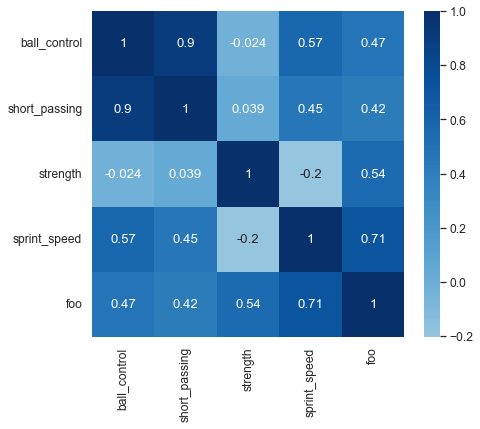

In [247]:
sns.heatmap(x_train.corr(), annot=True, cmap='Blues', center=0)

In [248]:
from sklearn.linear_model import Ridge

In [249]:
# `solver` parameters determines the algorithm used to solve regression task.
# we fix it to be `svd` to achieve desired results.
model_r = Ridge(alpha=0, fit_intercept=True, solver='svd')
fit_and_evaluate(model_r, x_train, y_train, x_test, y_test)

KeyError: 1

In [250]:
print(f'intercept: {model_r.intercept_}')
print(f'coef: {model_r.coef_.tolist()}')
print(f'l2 norm: {l2_norm(model_r.coef_)}')

intercept: 1475.5437329983563
coef: [0.9821418630058003, -0.039216551500840954, 295.8464789753521, 296.19864057625716, -295.9909003855496]
l2 norm: 512.708838477514


In [251]:
model_r = Ridge(alpha=0.01, fit_intercept=True, solver='svd')
fit_and_evaluate(model_r, x_train, y_train, x_test, y_test)

KeyError: 1

In [252]:
print(f'intercept: {model_r.intercept_}')
print(f'coef: {model_r.coef_.tolist()}')
print(f'l2 norm: {l2_norm(model_r.coef_)}')

intercept: -0.31429307160940567
coef: [0.982205019658534, -0.03927747187258031, 0.6748845052339087, 1.027021906559952, -0.819293442119448]
l2 norm: 1.7741911556249828


# Task 12. Putting all together. (up to 10 points)

## Make a new train/test split with new proportion: 70% on train and 30% on test data (1 point)

In [253]:
print(df.shape)

(10582, 35)


In [254]:
ix_split2 = int(0.7 * df.shape[0])
DF_TRAIN2 = df.iloc[:ix_split2].copy()
DF_TEST2 = df.iloc[ix_split2:].copy()
print(DF_TRAIN2.shape, DF_TEST2.shape)

(7407, 35) (3175, 35)


## Fit a model (up to 6 points)

### Choose >= 10 features from training set as initial set of features Explain your choice. (1 point)

In [255]:
df

,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,67.0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
5,74.0,76.0,80.0,53.0,58.0,71.0,40.0,73.0,70.0,69.0,68.0,71.0,79.0,78.0,78.0,67.0,90.0,71.0,85.0,79.0,56.0,62.0,68.0,67.0,60.0,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
38,65.0,67.0,64.0,58.0,60.0,66.0,52.0,66.0,67.0,63.0,62.0,67.0,77.0,74.0,85.0,51.0,92.0,61.0,65.0,66.0,71.0,57.0,60.0,55.0,64.0,68.0,61.0,23.0,22.0,24.0,16.0,11.0,12.0,9.0,13.0
64,69.0,69.0,57.0,21.0,68.0,65.0,48.0,56.0,38.0,40.0,61.0,62.0,33.0,34.0,62.0,57.0,41.0,59.0,71.0,49.0,90.0,29.0,70.0,62.0,26.0,54.0,37.0,72.0,71.0,68.0,15.0,12.0,13.0,12.0,11.0
87,70.0,70.0,46.0,34.0,73.0,65.0,33.0,47.0,42.0,25.0,58.0,58.0,33.0,31.0,41.0,68.0,52.0,48.0,67.0,60.0,75.0,26.0,66.0,68.0,29.0,41.0,45.0,75.0,73.0,71.0,8.0,6.0,16.0,12.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183924,73.0,73.0,42.0,27.0,74.0,70.0,30.0,54.0,49.0,33.0,53.0,63.0,53.0,63.0,62.0,68.0,62.0,57.0,84.0,54.0,76.0,30.0,75.0,66.0,22.0,52.0,50.0,76.0,77.0,72.0,14.0,10.0,11.0,8.0,12.0
183937,63.0,67.0,65.0,44.0,59.0,63.0,49.0,57.0,67.0,64.0,63.0,61.0,69.0,68.0,62.0,65.0,58.0,30.0,68.0,77.0,69.0,31.0,67.0,61.0,49.0,49.0,53.0,57.0,61.0,61.0,9.0,8.0,5.0,5.0,8.0
183953,68.0,73.0,64.0,38.0,71.0,66.0,57.0,65.0,60.0,44.0,60.0,67.0,71.0,73.0,59.0,69.0,72.0,59.0,42.0,70.0,68.0,53.0,78.0,64.0,58.0,66.0,61.0,67.0,71.0,59.0,15.0,13.0,5.0,6.0,6.0
183960,67.0,78.0,48.0,43.0,79.0,59.0,59.0,36.0,29.0,37.0,51.0,61.0,66.0,66.0,56.0,62.0,53.0,50.0,68.0,68.0,67.0,46.0,71.0,67.0,28.0,63.0,45.0,65.0,66.0,65.0,14.0,7.0,15.0,10.0,12.0


In [257]:
target = 'agility'
features = ['overall_rating', 'reactions', 'gk_reflexes', 'finishing', 'acceleration', 'short_passing', 'volleys', 'dribbling', 'curve', 'sprint_speed']

Выбрал features, которые на мой взгляд будут лучше коррелировать с agility 

### Visualize correlation matrix for selected features (1 point)

In [258]:
cols = features + [target]
print(cols)

['overall_rating', 'reactions', 'gk_reflexes', 'finishing', 'acceleration', 'short_passing', 'volleys', 'dribbling', 'curve', 'sprint_speed', 'agility']


,overall_rating,reactions,gk_reflexes,finishing,acceleration,short_passing,volleys,dribbling,curve,sprint_speed,agility
overall_rating,1.000000,0.786660,0.028654,0.274218,0.179805,0.420497,0.314662,0.307590,0.335269,0.196266,0.221162
reactions,0.786660,1.000000,-0.013277,0.299517,0.178649,0.406242,0.348653,0.317949,0.355061,0.174338,0.260984
gk_reflexes,0.028654,-0.013277,1.000000,-0.511724,-0.446661,-0.729905,-0.523945,-0.702130,-0.580270,-0.466739,-0.400950
finishing,0.274218,0.299517,-0.511724,1.000000,0.495660,0.598785,0.870025,0.784504,0.698224,0.479489,0.547516
acceleration,0.179805,0.178649,-0.446661,0.495660,1.000000,0.456805,0.465796,0.680446,0.516787,0.909341,0.800293
short_passing,0.420497,0.406242,-0.729905,0.598785,0.456805,1.000000,0.644577,0.809678,0.749726,0.449081,0.517836
volleys,0.314662,0.348653,-0.523945,0.870025,0.465796,0.644577,1.000000,0.782282,0.751440,0.447975,0.540948
dribbling,0.307590,0.317949,-0.702130,0.784504,0.680446,0.809678,0.782282,1.000000,0.817182,0.655600,0.711282
curve,0.335269,0.355061,-0.580270,0.698224,0.516787,0.749726,0.751440,0.817182,1.000000,0.486093,0.610468
sprint_speed,0.196266,0.174338,-0.466739,0.479489,0.909341,0.449081,0.447975,0.655600,0.486093,1.000000,0.733033


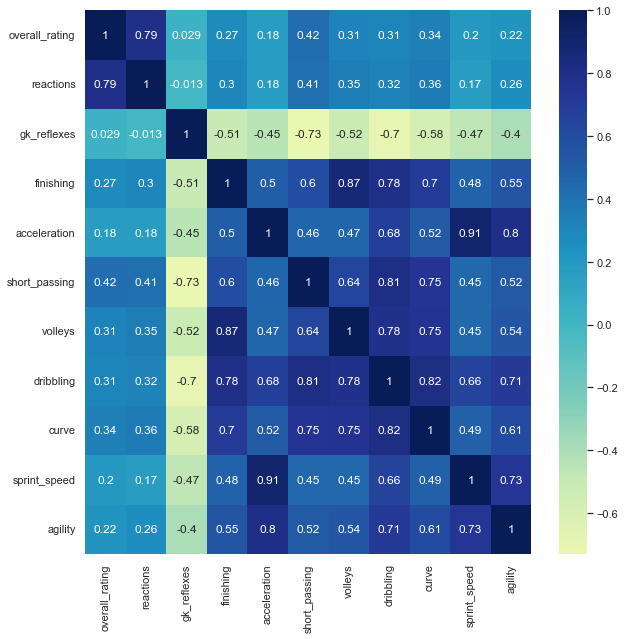

In [264]:
correlation_matrix =  DF_TRAIN2[cols].corr()
display(correlation_matrix)
sns.heatmap(correlation_matrix, cmap="YlGnBu", annot=True, center=0);

### Analyze if collinear/multicollinear features are present in your feature set.
Process collinear/multicollinear features if they are present:
remove redundant features, combine features into new ones, etc (up to 3 points)

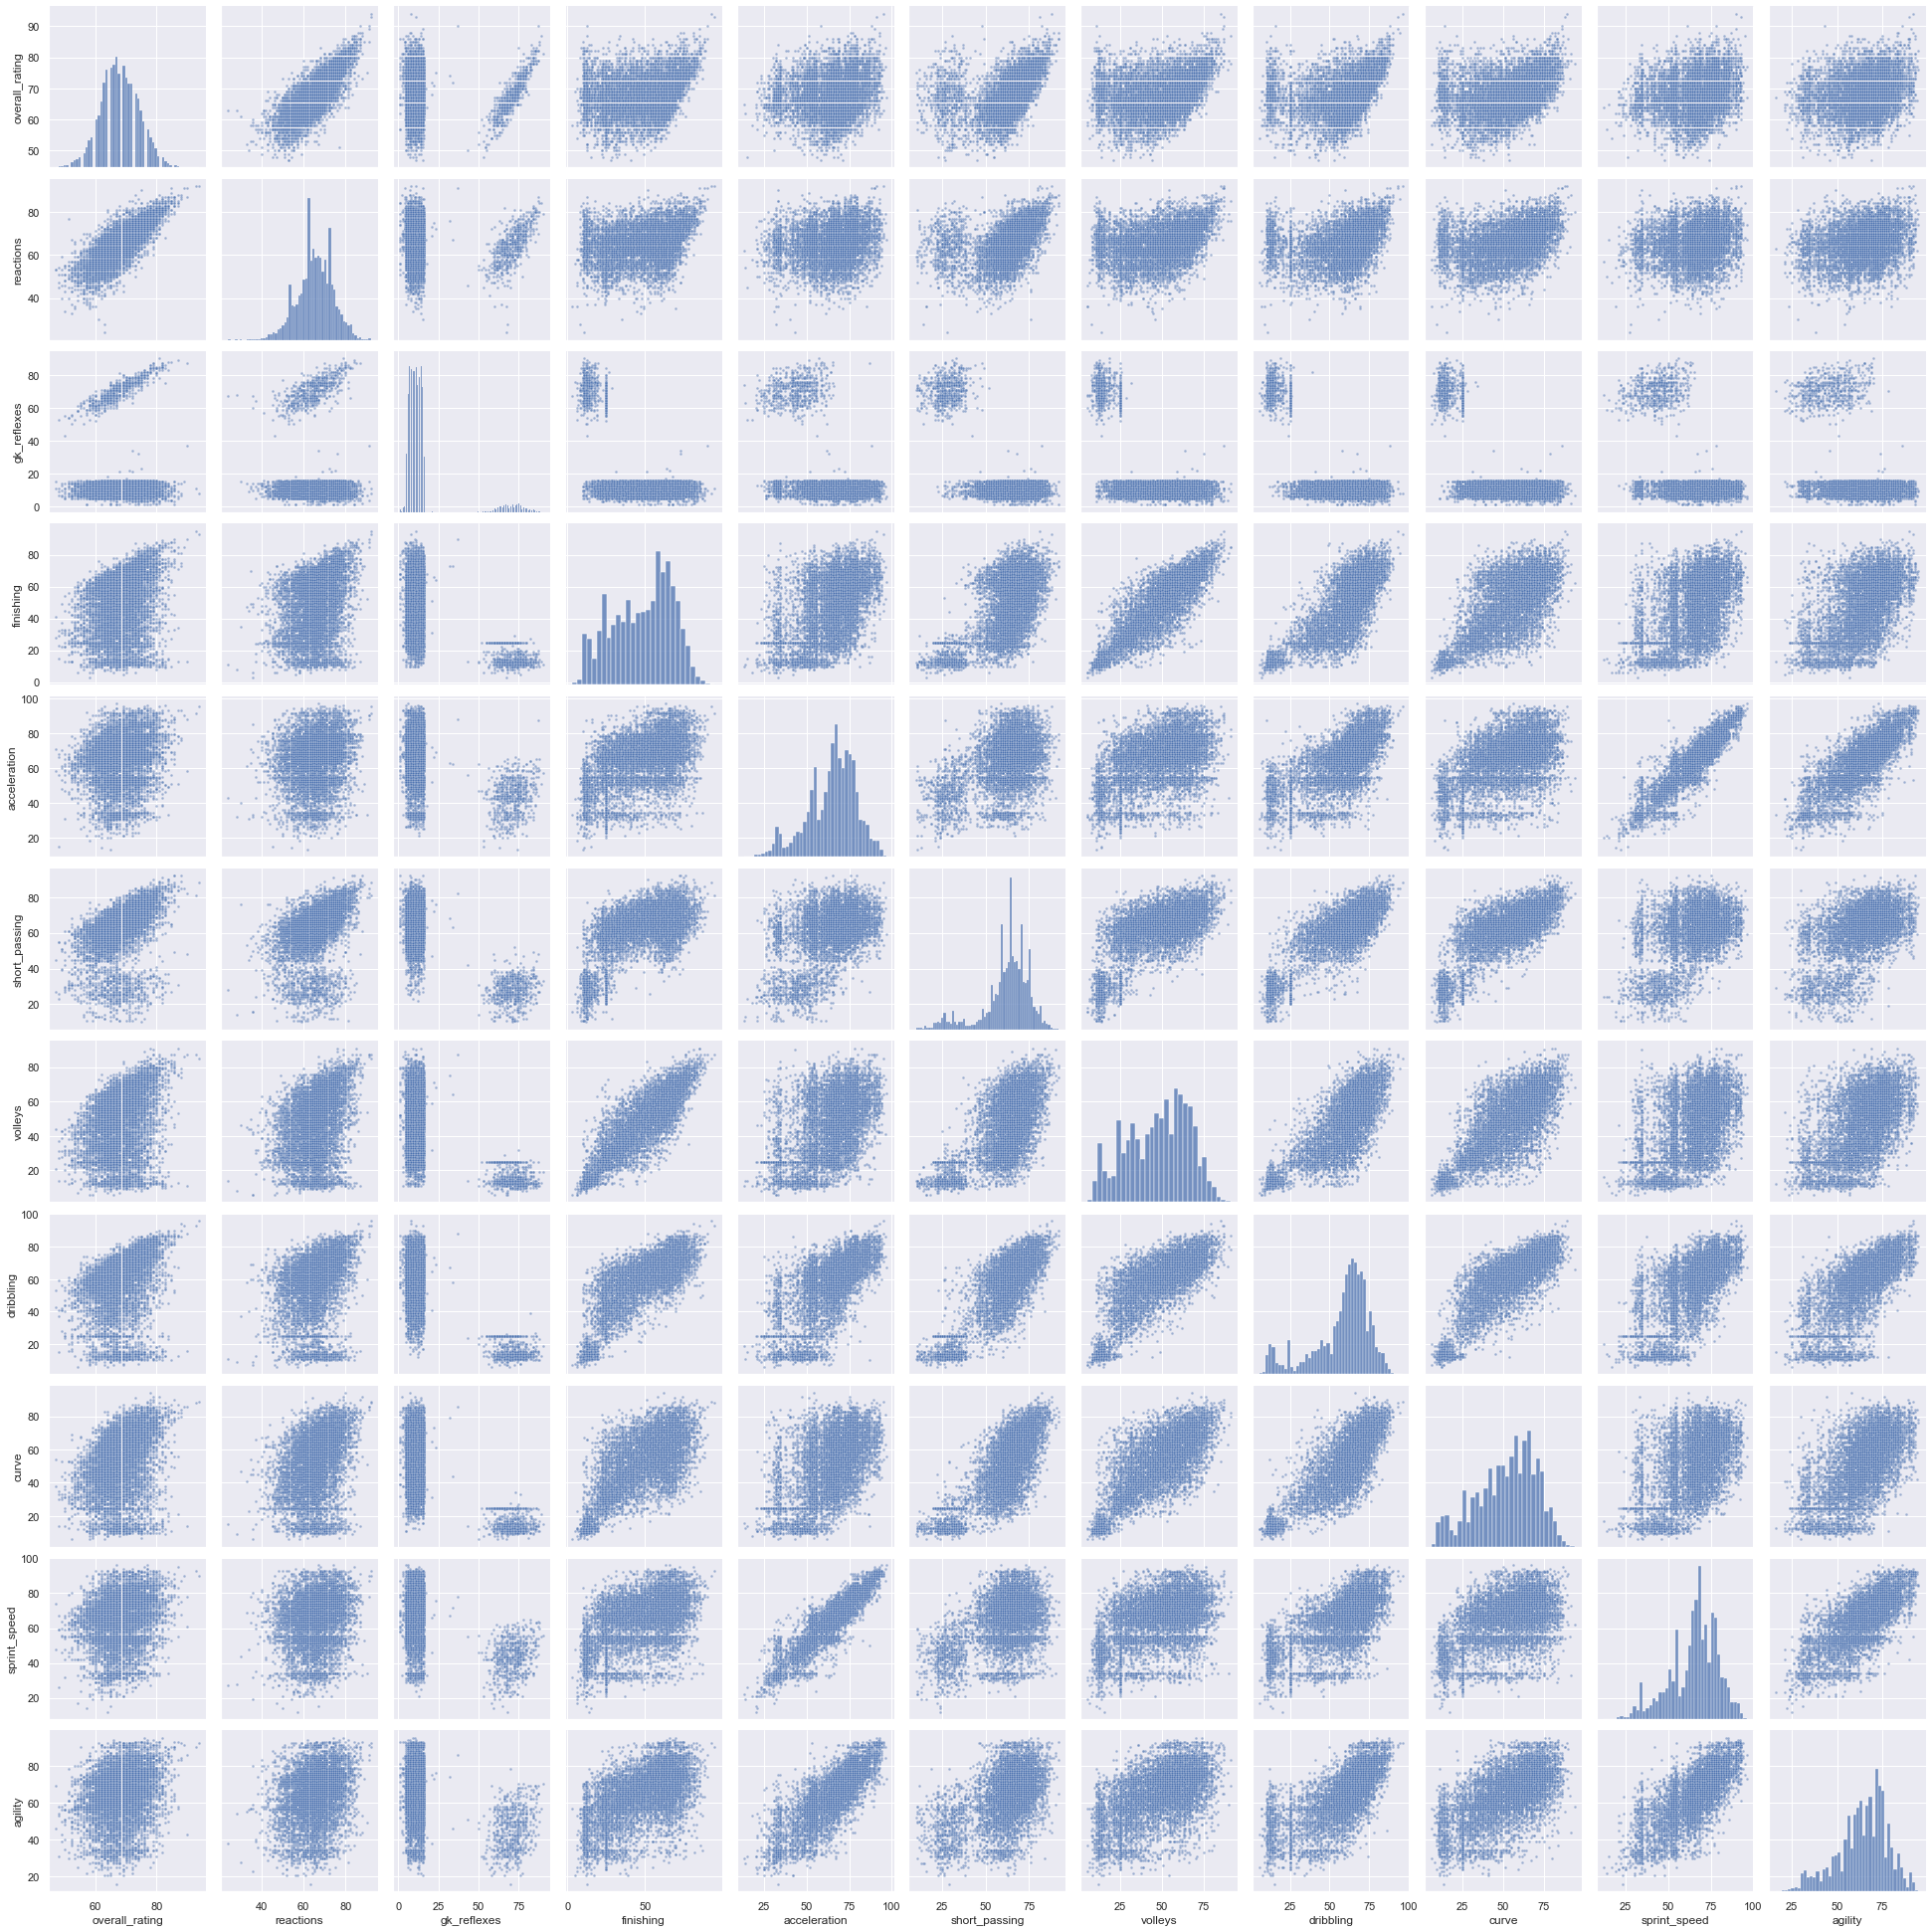

In [266]:
sns.pairplot(DF_TRAIN2[cols], plot_kws={'s': 7, 'alpha': 0.5});

Удалю 3 наименее коррелирующих объекта: 'overall_rating', 'reactions', 'gk_reflexes'.

In [267]:
features = ['finishing', 'acceleration', 'short_passing', 'volleys', 'dribbling', 'curve', 'sprint_speed']

### Fit the model and calculate metrics on train and test sets (1 point max. -0.25 points per each metric that was not implemented in the beginning of the assignment)

In [268]:
x_train_2, y_train_2, x_test_2, y_test_2 = get_train_test_data(features, target)

In [274]:
model = LinearRegression(fit_intercept=True)
model.fit(x_train_2, y_train_2);
model_intercept = model.intercept_
model_coef = model.coef_
model_preds = model.predict(x_test_2)
metrics_test_2 = get_metrics(y_true=np.asarray(y_test_2), y_pred=model_preds)
metrics_test_2

mse     62.626892
mae      5.984980
mape     0.107090
r2       0.675849
dtype: float64

In [275]:
l2_norm(model.coef_)

0.6245458530875047